In [22]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
import scipy.stats as sts
from matplotlib import pyplot as plt

In [3]:
file_path = 'final_accident_df.csv'
accident_df = pd.read_csv(file_path)
us_total_accidents = accident_df['Date'].count()

In [4]:
spring_dates_df = accident_df[(accident_df['Date'] >= '2019-03-01') & (accident_df['Date'] <= '2019-05-31')]
us_spring = spring_dates_df['Date'].count()

In [5]:
summer_dates_df = accident_df[(accident_df['Date'] >= '2019-06-01') & (accident_df['Date'] <= '2019-08-31')]
us_summer = summer_dates_df['Date'].count()

In [6]:
fall_dates_df = accident_df[(accident_df['Date'] >= '2019-09-01') & (accident_df['Date'] <= '2019-11-31')]
us_fall = fall_dates_df['Date'].count()

In [7]:
winter_dates_1 = accident_df[(accident_df['Date'] >= '2019-12-01') & (accident_df['Date'] <= '2019-12-31')]
winter_dates_2 = accident_df[(accident_df['Date'] >= '2019-01-01') & (accident_df['Date'] <= '2019-02-28')]
winter = winter_dates_1.append(winter_dates_2)
winter = winter.sort_values(by='Date', ascending=True)
us_winter = winter['Date'].count()

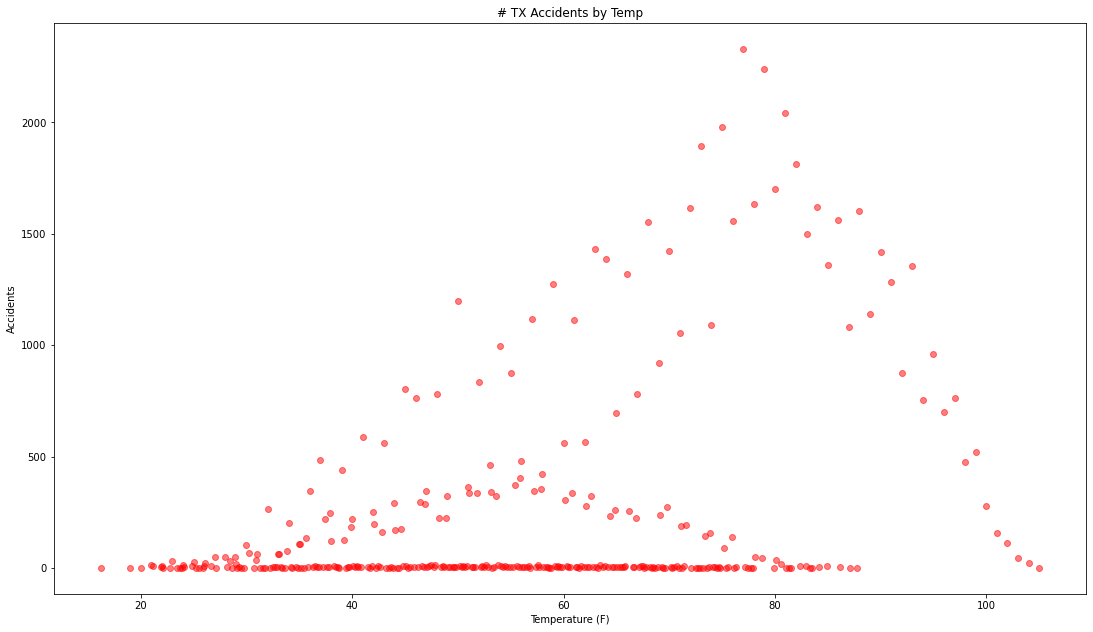

In [8]:
#TX TOTAL
tx_total = accident_df.loc[accident_df.State == 'TX', :]
tx_total_accidents = tx_total['Date'].count()
tx_total_pct = (tx_total_accidents / us_total_accidents) * 100
tx_total_pct
tx_accidents_vs_tx_weather = tx_total.groupby("Temperature(F)").count()['City'] 
tx_accidents_vs_tx_weather = tx_accidents_vs_tx_weather.reset_index()
fig, ax = plt.subplots()
ax.scatter(tx_accidents_vs_tx_weather['Temperature(F)'], tx_accidents_vs_tx_weather['City'] , color='red', alpha = 0.5)
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('# TX Accidents by Temp')
fig.set_size_inches(18.5, 10.5)
plt.show()

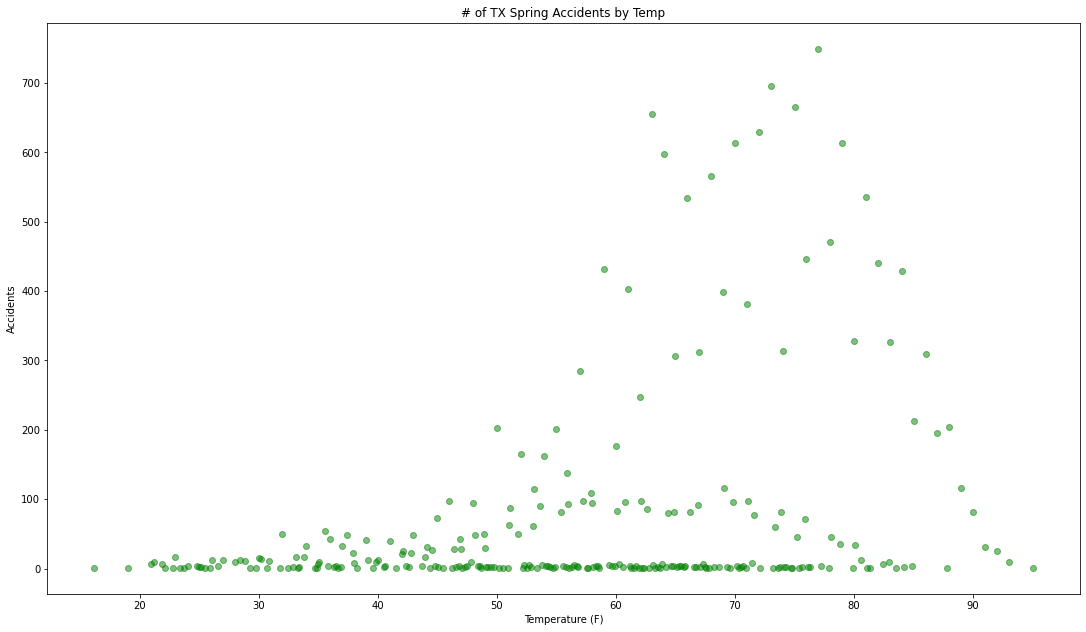

In [9]:
#TX SPRING
tx_spring = spring_dates_df.loc[spring_dates_df.State == 'TX', : ]
tx_spring_accidents = tx_spring['Date'].count()
tx_spring_pct = (tx_spring_accidents / us_spring) * 100
tx_spring_pct
tx_accidents_vs_tx_weather = tx_spring.groupby("Temperature(F)").count()['City'] 
tx_accidents_vs_tx_weather = tx_accidents_vs_tx_weather.reset_index()
fig, ax = plt.subplots()
ax.scatter(tx_accidents_vs_tx_weather['Temperature(F)'], tx_accidents_vs_tx_weather['City'] , color='green', alpha = 0.5)
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('# of TX Spring Accidents by Temp')
fig.set_size_inches(18.5, 10.5)
plt.show()

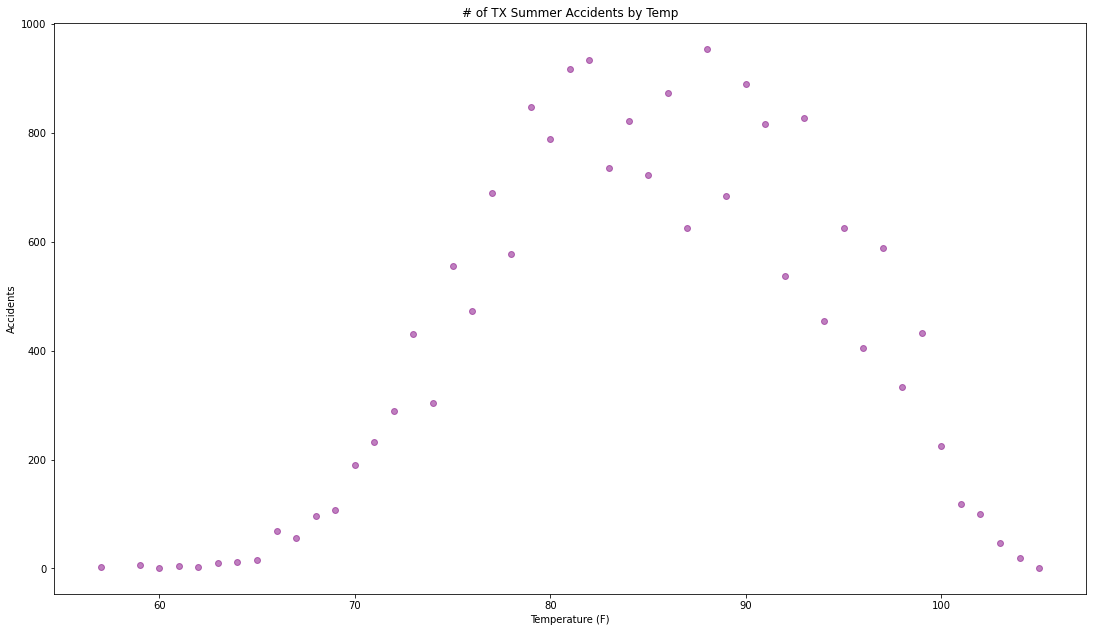

In [10]:
#TX SUMMER
tx_summer = summer_dates_df.loc[summer_dates_df.State == 'TX', :]
tx_summer_accidents = tx_summer['Date'].count()
tx_summer_pct = (tx_summer_accidents / us_summer) * 100
tx_summer_pct
tx_accidents_vs_tx_weather = tx_summer.groupby("Temperature(F)").count()['City'] 
tx_accidents_vs_tx_weather = tx_accidents_vs_tx_weather.reset_index()
fig, ax = plt.subplots()
ax.scatter(tx_accidents_vs_tx_weather['Temperature(F)'], tx_accidents_vs_tx_weather['City'] , color='purple', alpha = 0.5)
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('# of TX Summer Accidents by Temp')
fig.set_size_inches(18.5, 10.5)
plt.show()

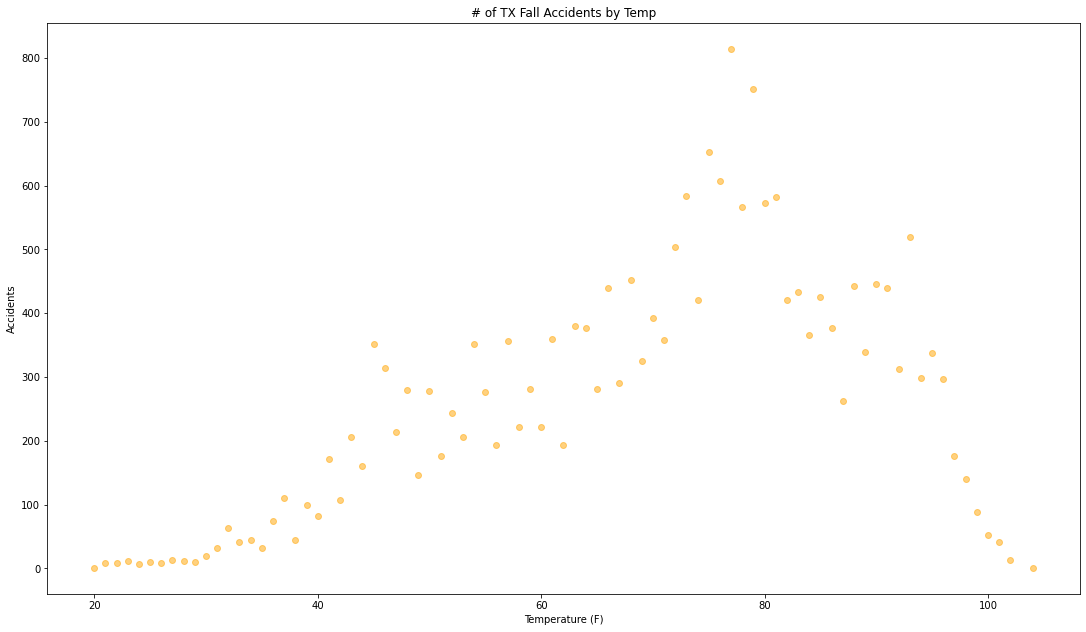

In [11]:
#TX FALL
tx_fall = fall_dates_df.loc[fall_dates_df.State == 'TX', :]
tx_fall_accidents = tx_fall['Date'].count()
tx_fall_pct = (tx_fall_accidents / us_fall) * 100
tx_fall_pct
tx_accidents_vs_tx_weather = tx_fall.groupby("Temperature(F)").count()['City'] 
tx_accidents_vs_tx_weather = tx_accidents_vs_tx_weather.reset_index()
fig, ax = plt.subplots()
ax.scatter(tx_accidents_vs_tx_weather['Temperature(F)'], tx_accidents_vs_tx_weather['City'] , color='orange', alpha = 0.5)
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('# of TX Fall Accidents by Temp')
fig.set_size_inches(18.5, 10.5)
plt.show()

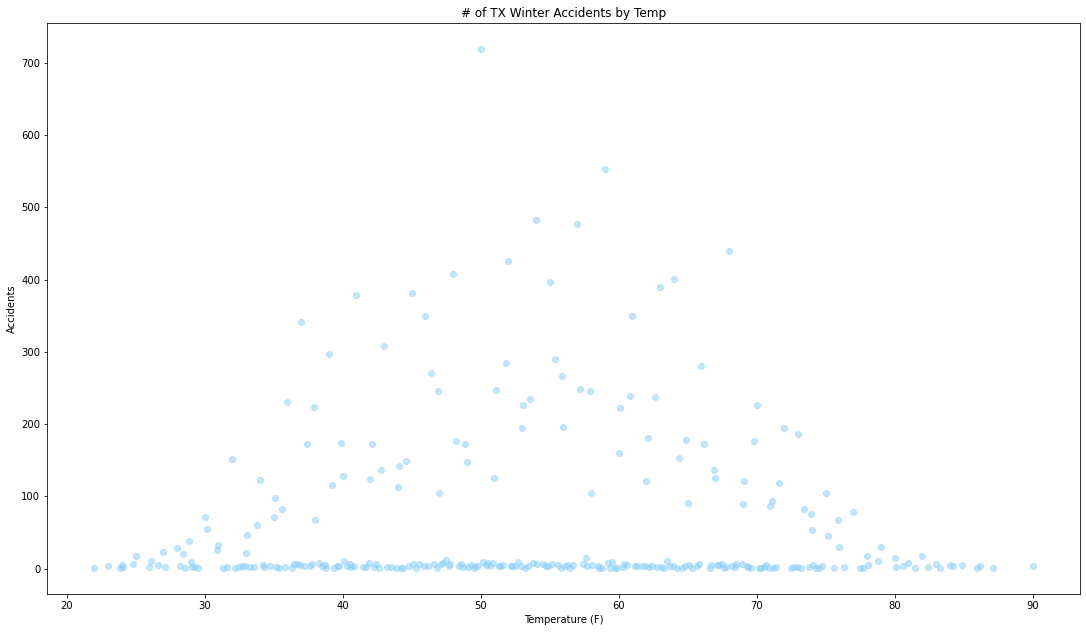

In [12]:
#TX WINTER
tx_winter = winter.loc[winter.State == 'TX', :]
tx_winter_accidents = tx_winter['Date'].count()
tx_winter_pct = (tx_winter_accidents / us_winter) * 100
tx_winter_pct
tx_accidents_vs_tx_weather = tx_winter.groupby("Temperature(F)").count()['City'] 
tx_accidents_vs_tx_weather = tx_accidents_vs_tx_weather.reset_index()
fig, ax = plt.subplots()
ax.scatter(tx_accidents_vs_tx_weather['Temperature(F)'], tx_accidents_vs_tx_weather['City'] , color='lightskyblue', alpha = 0.5)
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('# of TX Winter Accidents by Temp')
fig.set_size_inches(18.5, 10.5)
plt.show()

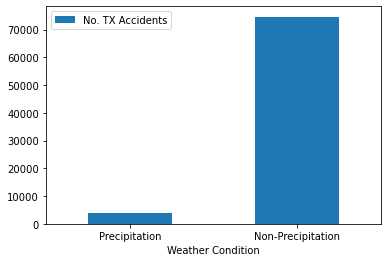

In [13]:
#2019 TX total accidents wet/dry bar graph
tx_total['Precipitation(in)'] = tx_total['Precipitation(in)'].fillna(0)
precip = tx_total['Precipitation(in)'] > 0
precip_wet = tx_total[precip]['Date'].count()
no_precip = tx_total['Precipitation(in)'] == 0
precip_dry = tx_total[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. TX Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. TX Accidents', rot=0)

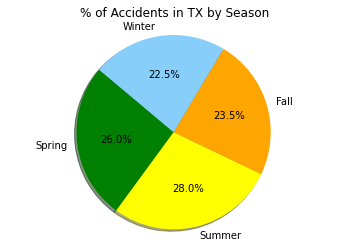

<Figure size 7200x7200 with 0 Axes>

In [14]:
label = ['Spring', 'Summer', 'Fall', 'Winter']
totals = [tx_spring_pct, tx_summer_pct, tx_fall_pct, tx_winter_pct]
colors = ['green', 'yellow', 'orange', 'lightskyblue']
#Change to bar chart
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(totals, labels = label, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
plt.title('% of Accidents in TX by Season')
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#print the final product to the screen
fig = plt.figure(figsize=(100,100))
plt.show()

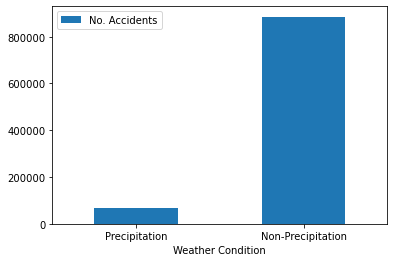

In [15]:
#2019 total US accidents wet/dry bar graph
accident_df['Precipitation(in)'] = accident_df['Precipitation(in)'].fillna(0)
precip = accident_df['Precipitation(in)'] > 0
precip_wet = accident_df[precip]['Date'].count()
no_precip = accident_df['Precipitation(in)'] == 0
precip_dry = accident_df[no_precip]['Date'].count()
df = pd.DataFrame({'Weather Condition':['Precipitation', 'Non-Precipitation'],'No. Accidents':[precip_wet,precip_dry]})
ax = df.plot.bar(x='Weather Condition', y='No. Accidents', rot=0)

In [48]:
#Chi_square test on 2019 US Accidents
observed = pd.Series([precip_wet, precip_dry], index=['Precipitation','Non-Precipitation'])
df = pd.DataFrame([observed]).T
df[1] = 0
df.columns = ['observed','expected']
df.loc['Precipitation','expected'] = 0
df.loc['Non-Precipitation','expected'] = 1
# df.head()
# critical_value = sts.chi2.ppf(q=0.90, df = 1)
# critical_value
# sts.chisquare(df['observed'], df['expected'])

In [49]:
df


,observed,expected
Precipitation,68239,0
Non-Precipitation,885494,1


In [27]:
critical_value

3.841458820694124

In [61]:
us_spring_stats = spring_dates_df.describe()
tx_spring_stats = tx_spring.describe()

In [62]:
us_summer_stats = summer_dates_df.describe()
tx_summer_stats = tx_summer.describe()

In [63]:
us_fall_stats = fall_dates_df.describe()
tx_fall_stats = tx_fall.describe()

In [64]:
us_winter_stats = winter.describe()
tx_winter_stats = tx_winter.describe()
# avg_us_winter_temp = us_winter_stats.loc['mean','Temperature(F)']

In [65]:
# winter = winter[(winter['Temperature(F)'] >= 3) & (winter['Temperature(F)'] <= 67)]
# winter.drop_duplicates(subset='State', inplace=True)
# winter.head(10)

In [66]:
# spring_dates_df = spring_dates_df[(spring_dates_df['Temperature(F)'] >= 24) & (spring_dates_df['Temperature(F)'] <= 70)]
# spring_dates_df.drop_duplicates(subset='State', inplace=True)
# spring_dates_df.head(10)
# spring_dates_df['State'].unique()

In [67]:
# summer_dates_df = summer_dates_df[(summer_dates_df['Temperature(F)'] >= 52) & (summer_dates_df['Temperature(F)'] <= 81)]
# summer_dates_df.drop_duplicates(subset='State', inplace=True)
# summer_dates_df.head(10)
# summer_dates_df['State'].unique()

In [68]:
# fall_dates_df = fall_dates_df[(fall_dates_df['Temperature(F)'] >= 27) & (fall_dates_df['Temperature(F)'] <= 73)]
# fall_dates_df.drop_duplicates(subset='State', inplace=True)
# fall_dates_df.head(10)
# fall_dates_df['State'].unique()

In [69]:
# count_dict = {
#     'Fall': fall_count,
#     'Spring': spring_count,
#     'Summer': summer_count,
#     'Winter': winter_count,
# }
# pd.DataFrame(count_dict)

In [70]:
# tx_array = tx_total['Temperature(F)']
# us_array = np.array([accident_df['Temperature(F)']])
# len(tx_array)
# population = us_array
# sample = tx_array

# plt.scatter(range(len(population)), population, label='population')
# plt.scatter(range(len(sample)), sample, label='sample')
# plt.legend()
